# Setup

In [1]:
import sys
PYTHON_PATH = sys.executable

In [11]:
!$PYTHON_PATH -m pip install --upgrade bitsandbytes>=0.39.0 accelerate>=0.20.0
!$PYTHON_PATH -m pip install --upgrade transformers guidance scikit-learn sentence-transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 62.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
axolotl 0.1 requires numpy==1.24.4, but you have numpy 1.26.4 which is incompatible.
axolotl 0.1 requires scikit-learn==1.2.2, but you have scikit-learn 1.4.2 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
!$PYTHON_PATH -m pip install --upgrade pandas==1.3.0 numpy

^C
ERROR: Operation cancelled by user

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
os.environ['OMP_NUM_THREADS'] = "32"
os.environ['NUMEXPR_NUM_THREADS'] = "32"

## Clustering

In [3]:
import json
with open('tmp/skills_from_llm.json', 'r') as f:
    skills_from_llm = json.load(f)

with open('tmp/edu_programs.json') as f:
    edu_programs = json.load(f)
    
skills_from_llm

{'5455': [{'name': 'Создание презентаций'},
  {'name': 'Работа с таблицами и графиками'},
  {'name': 'Редактирование текста и изображений'},
  {'name': 'Безопасное использование интернета'},
  {'name': 'Управление электронной почтой'},
  {'name': 'Использование облачных хранилищ'},
  {'name': 'Создание анимированных изображений'},
  {'name': 'Разработка мини-игр'}],
 '5578': [{'name': 'Работа с Adobe Photoshop'},
  {'name': 'Создание иллюстраций'},
  {'name': 'Работа с цветом'},
  {'name': 'Адаптация иллюстраций для различных форматов'},
  {'name': 'Создание логотипов'},
  {'name': 'Работа с шрифтами'},
  {'name': 'Создание плакатов'},
  {'name': 'Создание дизайна коммуникаций'}],
 '5191': [{'name': 'Полигональное моделирование'},
  {'name': 'Скульптинг в Blender'},
  {'name': 'Рендеринг 3D-моделей'},
  {'name': 'Модификаторы в Blender'},
  {'name': 'Примитивы в 3D-моделировании'},
  {'name': 'Ноды в сценарии Blender'},
  {'name': 'Спецэффекты в 3D-анимации'},
  {'name': 'Геометрия в 3

In [4]:
edu_programs

{'5455': {'name': 'Компьютерная грамотность',
  'url': 'https://gb.ru/courses/geek-school/literacy',
  'Направление (тег)': 'Профессии для школьников',
  'Специализация': ', Выберу в процессе обучения',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': '',
  'Уровень сложности': 'Junior',
  'Класс': '2-3 классы'},
 '5578': {'name': 'Графический дизайн',
  'url': 'https://gb.ru/courses/geek-school/graphic-design',
  'Направление (тег)': 'Профессии для школьников',
  'Специализация': ', Цифровое творчество',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': '',
  'Уровень сложности': 'Junior',
  'Класс': '4-6 класс,7-8 классы'},
 '5191': {'name': '3D-моделирование в Blender',
  'url': 'https://gb.ru/courses/geek-school/3d',
  'Направление (тег)': 'Профессии для школьников',
  'Специализация': ', Цифровое творчество',
  'Подвид': '',
  'Тип устройства': '',
  'Технологии, инструменты': '',
  'Уровень сложности': 'Junior',
  'Класс': '4-6 классы,7-8 кл

In [18]:
documents = []
for program_id in edu_programs:
    title = edu_programs[program_id]['name']
    skills = skills_from_llm[program_id]
    
    s = f"Название курса: \"{title}\"\n"
    s += 'Навыки и изучаемые технологии на курсе:\n'
    for skill in skills:
        s += f"- {skill['name']}\n"
    documents += [(program_id, s)]
    
print(documents[0][1])

Название курса: "Компьютерная грамотность"
Навыки и изучаемые технологии на курсе:
- Создание презентаций
- Работа с таблицами и графиками
- Редактирование текста и изображений
- Безопасное использование интернета
- Управление электронной почтой
- Использование облачных хранилищ
- Создание анимированных изображений
- Разработка мини-игр



In [99]:
from sklearn.cluster import AgglomerativeClustering
from sentence_transformers import SentenceTransformer
import pandas as pd

# Load model
model = SentenceTransformer('intfloat/multilingual-e5-base')


# Encode documents
embeddings = model.encode([t[1] for t in documents])

# Create distance matrix
distance_matrix = 1 - embeddings @ embeddings.T

# Calculate the linkage matrix
linkage_matrix = linkage(distance_matrix, method='single')
cluster_assignments = fcluster(linkage_matrix, depth=3,criterion='maxclust', t=45)  # Adjust 't' as needed


# # Print cluster assignments
# for doc, cluster in zip(documents, cluster_assignments):
#     print(f'Document: {doc} \nCluster: {cluster}\n')

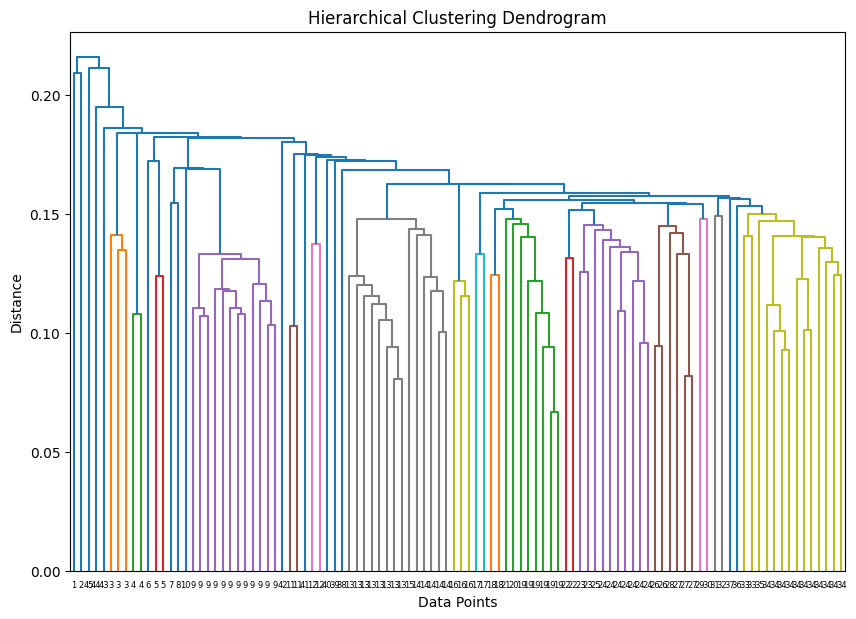

In [100]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


# Plot the dendrogram
plt.figure(figsize=(10, 7))  
dendrogram(linkage_matrix, leaf_font_size=6, leaf_rotation=0, labels=cluster_assignments)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [101]:
from scipy.cluster.hierarchy import fcluster

# Create a dictionary to store the cluster hierarchy
cluster_hierarchy = {}

# # Function to recursively build the cluster hierarchy
# def build_hierarchy(cluster_id, member):
#     if isinstance(member, int):
#         return {'id': member}
#     else:
#         children = []
#         for sub_member in member:
#             child_cluster = build_hierarchy(None, sub_member)
#             children.append(child_cluster)
#         return {'id': cluster_id, 'children': children}

# Build the cluster hierarchy
for data_point_id, cluster_id in enumerate(cluster_assignments):
    program_id = documents[data_point_id][0]
    if cluster_id not in cluster_hierarchy:
        cluster_hierarchy[cluster_id] = {'id': cluster_id, 'children': []}
    cluster_hierarchy[cluster_id]['children'].append({'id': program_id})



# Write the cluster hierarchy to a YAML file
# with open('cluster_hierarchy.yaml', 'w') as file:
#     yaml.dump(cluster_hierarchy, file, default_flow_style=False)

In [102]:
import numpy as np
np.unique(cluster_assignments)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int32)

In [103]:
def print_tree(node, id_to_name, level=0):
    if 'id' in node:
        node_id = node['id']
        node_name = id_to_name.get(node_id, "Node " + str(node_id))
        print(' '*level + '- ' +node_name)
    
    if 'children' in node:
        for child in node['children']:
            print_tree(child, id_to_name, level=level+1)

# Example usage
tree = cluster_hierarchy

id_to_name = {k:v['name'] for k, v in edu_programs.items()}

for node_id, node in tree.items():
    print_tree(node, id_to_name)

- Node 39
 - Компьютерная грамотность
- Node 34
 - Графический дизайн
 - Графический дизайнер Мастер
 - Графический дизайнер
 - Цифровой дизайнер Мастер
 - Цифровой дизайнер
 - Дизайнер интерьеров
 - Дизайнер
 - UX/UI дизайнер Мастер
 - Дизайнер интерфейсов (UX/UI). Специалист
 - Графический дизайнер. Специалист
 - Концепт-художник
- Node 18
 - 3D-моделирование в Blender
 - Углублённый курс по анимации
- Node 19
 - Дизайн и программирование в Roblox Studio
 - Программирование и разработка игр на Scratch
 - Разработка игр на Unity для детей
 - Геймдизайнер с нуля до PRO
 - Разработчик Игр на Unreal Engine
 - Разработчик Игр на Unity
- Node 27
 - Разработчик
 - Инженер-программист 
 - Разработчик для школьников
- Node 20
 - Программирование и 3D-моделирование в Minecraft
- Node 13
 - Инженер-аналитик 
 - BI (Business Intelligence) аналитик 
 - Продуктовый аналитик 
 - Системный и бизнес аналитик
 - Финансовый аналитик. Специалист
 - Аналитик данных. Специалист	
 - Бизнес-аналитик. Специа